# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head(n=5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

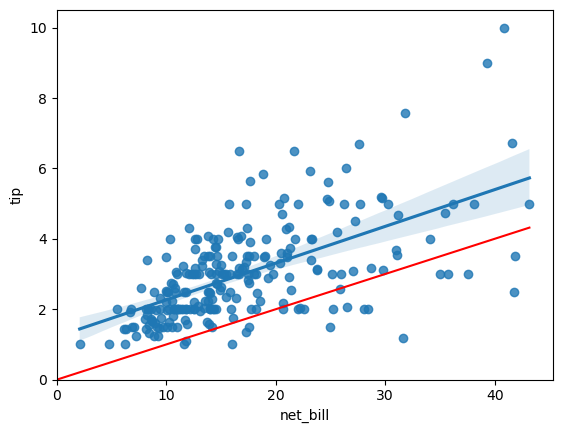

In [4]:
sns.regplot(y='tip', x='net_bill' , data=tips.loc[tips['tip_pct'] < .5])

x = np.linspace(0,tips['net_bill'].max(), 100)
y = .1*x

plt.plot(x,y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [5]:
reg_1 = smf.ols('tip ~ net_bill', data = tips).fit()

In [6]:
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
reg_1.predict(dados_novos)

0    2.918050
1    2.192915
2    3.070031
3    3.354125
4    3.414719
dtype: float64

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 0.505398619388979)

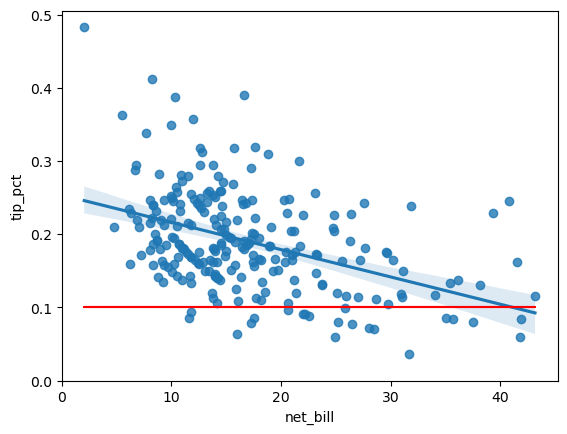

In [8]:
sns.regplot(x='net_bill', y='tip_pct', data=tips.loc[tips['tip_pct']<.5])

x = tips['net_bill']
y = [0.1] * len(x)

plt.plot(x,y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [9]:
reg_2 = smf.ols('tip ~ tip_pct', data = tips).fit()

In [10]:
dados_novos.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [11]:
reg_2.predict(dados_novos)

0    2.714081
1    2.976022
2    2.993701
3    2.917205
4    2.936793
dtype: float64

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$ ?

Resposta: A observação mais fácil de se ter é de que a tendência da linha é invertida comparando os dois gráficos, onde uma é proporcional ao valor do eixo x e a outra é inversamente proporcional. Outro importante ponto é de que em determinado momento no eixo X, a linha do modelo cruza com a linha dos 10%, isto quando a variável explicativa é 'tip_pct', o mesmo não ocorre quando a variável é 'tip' onde a tendência crescente da linha não permite que elas se cruzem, mas é possivel tirar uma informação valiosa deste segundo plot, informando que a partir de um valor da conta a relação entre conta e gorjeta desce até ser inferior aos 10% comumente praticados como "taxa de serviço" em restaurantes no Brasil. 

R-quadrático do modelo com valores absolutos é superior porém seu erro médio quadrático também é consideravelmente superior.

In [12]:
reg_1.rsquared

0.3325407312323707

In [13]:
reg_2.rsquared

0.05835692085324429

In [14]:
reg_1.mse_model

154.70209729635695

In [15]:
reg_2.mse_model

27.148367703100746

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [18]:
comparacao_prevista_contra_real_reg_2 = pd.DataFrame({'Ŷ': reg_2.fittedvalues, 'Y': tips['tip']})
comparacao_prevista_contra_real_reg_2

,Ŷ,Y
0,2.714081,1.01
1,2.976022,1.66
2,2.993701,3.50
3,2.917205,3.31
4,2.936793,3.61
...,...,...
239,3.108838,5.92
240,2.747272,2.00
241,2.782726,2.00
242,2.807562,1.75


In [24]:
comparacao_prevista_contra_real_reg_1 = pd.DataFrame({'Ŷ': reg_1.fittedvalues, 'Y': tips['tip']})
comparacao_prevista_contra_real_reg_1

,Ŷ,Y
0,2.918050,1.01
1,2.192915,1.66
2,3.070031,3.50
3,3.354125,3.31
4,3.414719,3.61
...,...,...
239,3.626300,5.92
240,3.831920,2.00
241,3.383925,2.00
242,2.926990,1.75


In [25]:
r_quadratico = reg_1.rsquared
print(f'O valor de R-Quadrático do primeiro modelo é de {round(r_quadratico, 2)}')

O valor de R-Quadrático do primeiro modelo é de 0.33


In [27]:
r_quadratico = reg_2.rsquared
print(f'O valor de R-Quadrático do segundo modelo é de {round(r_quadratico, 2)}')

O valor de R-Quadrático do segundo modelo é de 0.06


Resposta: O R-Quadrático do primeiro modelo é bem superior ao segundo